In [2]:
# Dependencies
import requests
import json
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Google API Key
from config import g_key

In [3]:
# Build URL using the Youtube API 
base_url = "https://www.googleapis.com/youtube/v3/videoCategories?part=snippet&regionCode=us&key="+g_key


In [4]:
US_data = requests.get(base_url).json()
print(json.dumps(US_data, indent=4, sort_keys=True))

{
    "etag": "duhcusJjfFwQOryKfTwNR7bn0pM",
    "items": [
        {
            "etag": "IfWa37JGcqZs-jZeAyFGkbeh6bc",
            "id": "1",
            "kind": "youtube#videoCategory",
            "snippet": {
                "assignable": true,
                "channelId": "UCBR8-60-B28hp2BmDPdntcQ",
                "title": "Film & Animation"
            }
        },
        {
            "etag": "5XGylIs7zkjHh5940dsT5862m1Y",
            "id": "2",
            "kind": "youtube#videoCategory",
            "snippet": {
                "assignable": true,
                "channelId": "UCBR8-60-B28hp2BmDPdntcQ",
                "title": "Autos & Vehicles"
            }
        },
        {
            "etag": "HCjFMARbBeWjpm6PDfReCOMOZGA",
            "id": "10",
            "kind": "youtube#videoCategory",
            "snippet": {
                "assignable": true,
                "channelId": "UCBR8-60-B28hp2BmDPdntcQ",
                "title": "Music"
            }
        },
  

In [5]:
# Draft category IDs into a dictionary

categories = US_data["items"]
category_dict = {}

for category in categories:
    category_dict[category["id"]] = category["snippet"]["title"]
    
category_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [6]:
# Save path to data set in a variable
data_file = "Resources/USvideos.csv"

In [7]:
#Read the CSV file to get the Data
data_file_df = pd.read_csv(data_file)
data_file_df.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...


In [8]:
#View the column series in the data
data_file_df = pd.read_csv(data_file)
data_file_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [9]:
#Remove the duplicates and clean the data
data_file_df = data_file_df.drop_duplicates(subset=None, keep='first', inplace=False)
data_file_df.shape

(40901, 16)

In [10]:
#Select Column Headers that are vital for our analysis
organized_df = data_file_df[[ "category_id", "views", "likes", "dislikes", "comment_count"]] 
organized_df.head()

,category_id,views,likes,dislikes,comment_count
0,22,748374,57527,2966,15954
1,24,2418783,97185,6146,12703
2,23,3191434,146033,5339,8181
3,24,343168,10172,666,2146
4,24,2095731,132235,1989,17518


In [11]:
#Rename Column Headers

organized_df = organized_df.rename(columns={"category_id":"Category ID",
                                                 "views":"Total Views",
                                                 "likes":"Total Likes",
                                                 "dislikes":"Total Dislikes",
                                                 "comment_count":"Total Comments"})
                                                 

organized_df.head()

,Category ID,Total Views,Total Likes,Total Dislikes,Total Comments
0,22,748374,57527,2966,15954
1,24,2418783,97185,6146,12703
2,23,3191434,146033,5339,8181
3,24,343168,10172,666,2146
4,24,2095731,132235,1989,17518


In [12]:
#Review count to ensure no null values exist in the cleaned data
organized_df.count()

Category ID       40901
Total Views       40901
Total Likes       40901
Total Dislikes    40901
Total Comments    40901
dtype: int64

In [13]:
#Add Rename Category Id's into the Category Dictionary list

for index, row in organized_df.iterrows():
    organized_df.loc[index, "Category ID"] = category_dict[str(row["Category ID"])]  

In [14]:
organized_df.head()

,Category ID,Total Views,Total Likes,Total Dislikes,Total Comments
0,People & Blogs,748374,57527,2966,15954
1,Entertainment,2418783,97185,6146,12703
2,Comedy,3191434,146033,5339,8181
3,Entertainment,343168,10172,666,2146
4,Entertainment,2095731,132235,1989,17518


In [15]:
#Apply groupby fxn to compare category_id vs views
grp_organized_df = organized_df.groupby(['Category ID'])

views_df = pd.DataFrame(grp_organized_df['Total Views'].sum())

views_df = views_df.sort_values(by =["Total Views"], ascending=False)

#views_df.head()

# divide views by one billion
new_column = views_df["Total Views"]/1000000000

# reset index to get nice dataframe printout
new_df1 = new_column.reset_index()
new_df1

,Category ID,Total Views
0,Music,40.126287
1,Entertainment,20.561102
2,Film & Animation,7.267792
3,Comedy,5.111267
4,People & Blogs,4.910005
5,Sports,4.403214
6,Howto & Style,4.071012
7,Science & Technology,3.473463
8,Gaming,2.127800
9,News & Politics,1.473090


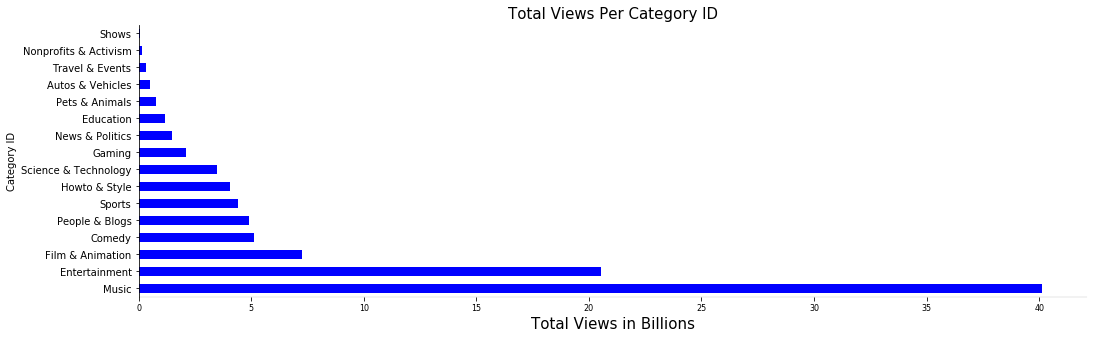

In [88]:
# Use DataFrame.plot() in order to create a bar chart for the total views

barh = new_column.plot(kind='barh',figsize=(17,5), color = "blue", legend = None)
barh
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 8)
plt.xlabel("Total Views in Billions", fontsize = 15)
plt.title("Total Views Per Category ID", fontsize =15 )
barh.spines['top'].set_visible(False)
barh.spines['right'].set_visible(False)
barh.spines['bottom'].set_linewidth(0.1)
barh.spines['left'].set_visible(True)
plt.savefig("output_data/Total views per Category ID.png")
plt.show()

In [24]:
#Apply groupby fxn to compare category_id vs likes
grp_organized_df = organized_df.groupby(['Category ID'])

likes_df = pd.DataFrame(grp_organized_df['Total Likes'].sum())

likes_df = likes_df.sort_values(by =["Total Likes"], ascending=False)

#likes_df.head()

# divide likes by one billion
new_column2 = likes_df["Total Likes"]/10000000

# reset index to get nice dataframe printout
new_df2 = new_column2.reset_index()
new_df2

,Category ID,Total Likes
0,Music,141.657274
1,Entertainment,52.923322
2,Comedy,21.613631
3,People & Blogs,18.635033
4,Film & Animation,16.560473
5,Howto & Style,16.251589
6,Sports,9.861493
7,Science & Technology,8.225501
8,Gaming,6.877956
9,Education,4.924796


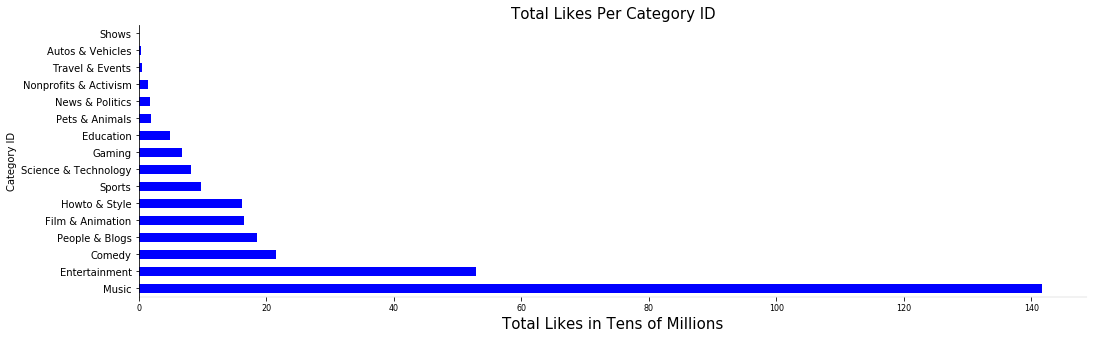

In [96]:
# Use DataFrame.plot() in order to create a bar chart for the total likes

barh = new_column2.plot(kind='barh',figsize=(17,5), color = "blue", legend = None)
barh
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 8)
plt.xlabel("Total Likes in Tens of Millions", fontsize = 15)
plt.title("Total Likes Per Category ID", fontsize=15)
barh.spines['top'].set_visible(False)
barh.spines['right'].set_visible(False)
barh.spines['bottom'].set_linewidth(0.1)
barh.spines['left'].set_visible(True)
plt.savefig("output_data/Total Likes Per Category ID.png")
plt.show()

In [26]:
#Apply groupby fxn to compare category_id vs dislikes
grp_organized_df = organized_df.groupby(['Category ID'])

dislikes_df = pd.DataFrame(grp_organized_df['Total Dislikes'].sum())

dislikes_df = dislikes_df.sort_values(by =["Total Dislikes"], ascending=False)

#dislikes_df.head()

# divide dislikes by one billion
new_column3 = dislikes_df["Total Dislikes"]/1000000

# reset index to get nice dataframe printout
new_df3 = new_column3.reset_index()
new_df3

,Category ID,Total Dislikes
0,Music,51.173364
1,Entertainment,42.904603
2,People & Blogs,10.178864
3,Gaming,9.161661
4,Comedy,7.219986
5,Film & Animation,6.071246
6,Howto & Style,5.462302
7,Sports,5.132721
8,Science & Technology,4.531899
9,News & Politics,4.179491


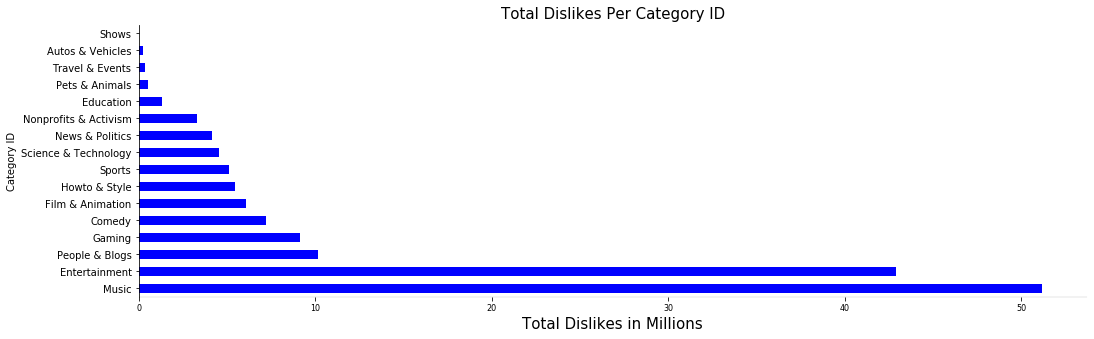

In [97]:
# Use DataFrame.plot() in order to create a bar chart for the dislikes

barh = new_column3.plot(kind='barh',figsize=(17,5), color = "blue", legend = None)
barh
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 8)
plt.xlabel("Total Dislikes in Millions", fontsize = 15)
plt.title("Total Dislikes Per Category ID", fontsize=15)
barh.spines['top'].set_visible(False)
barh.spines['right'].set_visible(False)
barh.spines['bottom'].set_linewidth(0.1)
barh.spines['left'].set_visible(True)
plt.savefig("output_data/Total Dislikes Per Category ID.png")
plt.show()

In [28]:
#Apply groupby fxn to compare category_id vs comment_count
grp_organized_df = organized_df.groupby(['Category ID'])

comments_df = pd.DataFrame(grp_organized_df['Total Comments'].sum())

comments_df = comments_df.sort_values(by =["Total Comments"], ascending=False)

#comment_df.head()

# divide comments by one billion
new_column4 = comments_df["Total Comments"]/1000000

# reset index to get nice dataframe printout
new_df4 = new_column4.reset_index()
new_df4

,Category ID,Total Comments
0,Music,125.275820
1,Entertainment,73.448375
2,People & Blogs,24.759019
3,Howto & Style,23.095757
4,Comedy,22.496604
5,Film & Animation,17.877359
6,Gaming,14.720836
7,Science & Technology,11.954553
8,Sports,11.189359
9,News & Politics,6.037217


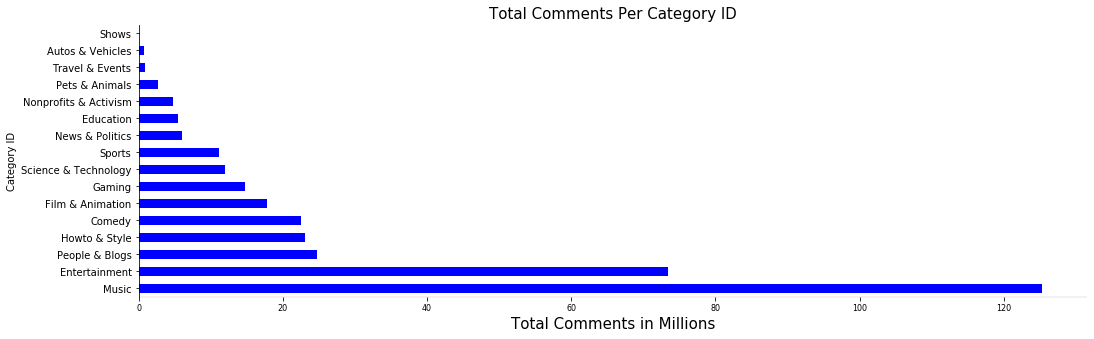

In [98]:
# Use DataFrame.plot() in order to create a bar chart for the comments
barh = new_column4.plot(kind='barh',figsize=(17,5), color = "blue", legend = None)
barh
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 8)
plt.xlabel("Total Comments in Millions", fontsize = 15)
plt.title("Total Comments Per Category ID", fontsize=15)
barh.spines['top'].set_visible(False)
barh.spines['right'].set_visible(False)
barh.spines['bottom'].set_linewidth(0.1)
barh.spines['left'].set_visible(True)
plt.savefig("output_data/Total Comments Per Category ID.png")
plt.show()